# Model Calibration
In this Notebook data is used to calibrate the parameters of the Model

This may either be done via the complete method or by using the deterministic approximatite solution

The results from RM were useful in knowing where to look in the parameter space and to know how the model should behave.
The calibrated values for RM were used as a starting point and optimal parameters were searched for in a space looking like that one.

In [13]:
# Import packages
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import community
from shapely.geometry import Polygon
import importlib

import DDOM # Data Driven Occupational Mobility

import random
import math

import cmocean as cmo


%matplotlib inline

In [17]:
# Read the data from data_processing.ipynb
sa_calibration_data = pd.read_csv('../Data_Labour/calibration_data.csv')
employment_SSYK = pd.read_csv('../Data_Labour/occupational_employment.csv', sep = ',')
SSYK_shock = pd.read_csv('../Data_Labour/occupation_shock.csv', sep = ',')

G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')

Simulation index: 0
a: 0.0225 delta_u: 0.011 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:20:13.614566
a:  0.0225 delta_u:  0.011 delta_ny:  0.007 gamma_u:  0.1


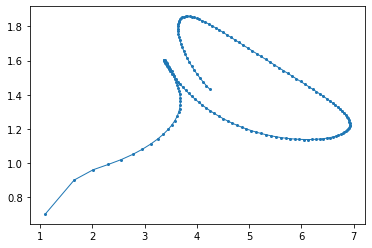

A_m is not valid
Simulation took:  0:00:50.412725
Simulation index: 1
a: 0.025 delta_u: 0.011 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:21:04.049943
a:  0.025 delta_u:  0.011 delta_ny:  0.007 gamma_u:  0.1


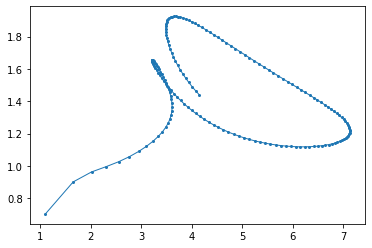

A_m is not valid
Simulation took:  0:00:51.236294
Simulation index: 2
a: 0.0275 delta_u: 0.011 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:21:55.305178
a:  0.0275 delta_u:  0.011 delta_ny:  0.007 gamma_u:  0.1


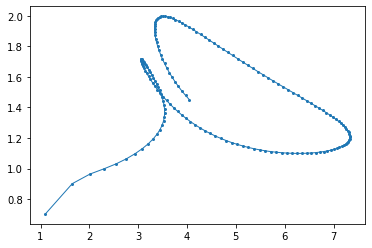

A_m is not valid
Simulation took:  0:00:52.649318
Simulation index: 3
a: 0.03 delta_u: 0.011 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:22:47.976705
a:  0.03 delta_u:  0.011 delta_ny:  0.007 gamma_u:  0.1


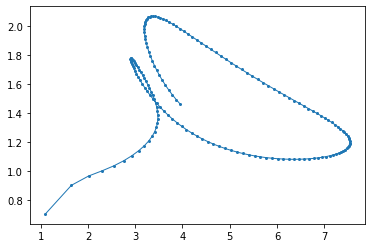

A_m is not valid
Simulation took:  0:01:03.550812
Simulation index: 4
a: 0.0225 delta_u: 0.011 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:23:51.542707
a:  0.0225 delta_u:  0.011 delta_ny:  0.008 gamma_u:  0.1


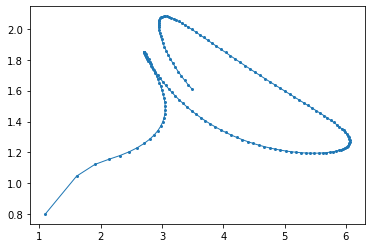

A_m is not valid
Simulation took:  0:00:51.497392
Simulation index: 5
a: 0.025 delta_u: 0.011 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:24:43.059096
a:  0.025 delta_u:  0.011 delta_ny:  0.008 gamma_u:  0.1


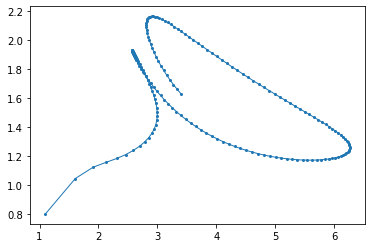

A_m is not valid
Simulation took:  0:00:52.742890
Simulation index: 6
a: 0.0275 delta_u: 0.011 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:25:35.819295
a:  0.0275 delta_u:  0.011 delta_ny:  0.008 gamma_u:  0.1


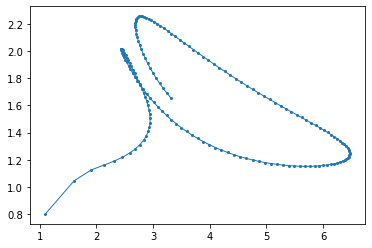

A_m is not valid
Simulation took:  0:00:53.782557
Simulation index: 7
a: 0.03 delta_u: 0.011 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:26:29.617626
a:  0.03 delta_u:  0.011 delta_ny:  0.008 gamma_u:  0.1


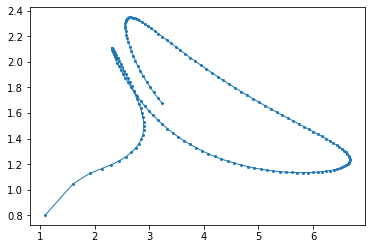

A_m is not valid
Simulation took:  0:00:52.362727
Simulation index: 8
a: 0.0225 delta_u: 0.011 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:27:21.996894
a:  0.0225 delta_u:  0.011 delta_ny:  0.009 gamma_u:  0.1


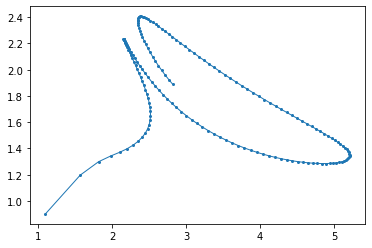

A_m is not valid
Simulation took:  0:00:57.560915
Simulation index: 9
a: 0.025 delta_u: 0.011 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:28:19.572381
a:  0.025 delta_u:  0.011 delta_ny:  0.009 gamma_u:  0.1


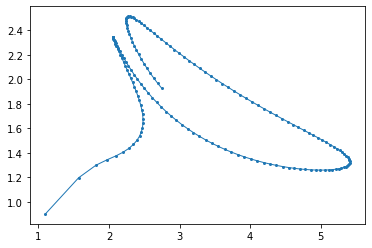

A_m is not valid
Simulation took:  0:00:55.769588
Simulation index: 10
a: 0.0275 delta_u: 0.011 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:29:15.379482
a:  0.0275 delta_u:  0.011 delta_ny:  0.009 gamma_u:  0.1


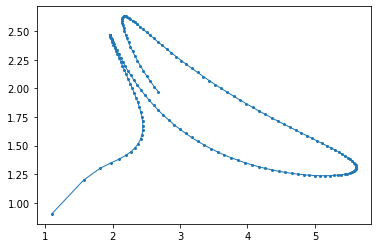

A_m is not valid
Simulation took:  0:00:53.855164
Simulation index: 11
a: 0.03 delta_u: 0.011 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:30:09.260746
a:  0.03 delta_u:  0.011 delta_ny:  0.009 gamma_u:  0.1


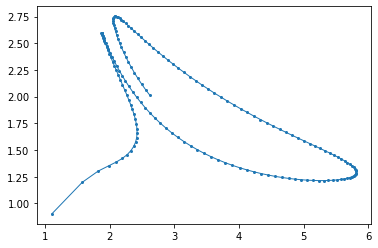

A_m is not valid
Simulation took:  0:00:54.307314
Simulation index: 12
a: 0.0225 delta_u: 0.011 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:31:03.802718
a:  0.0225 delta_u:  0.011 delta_ny:  0.01 gamma_u:  0.1


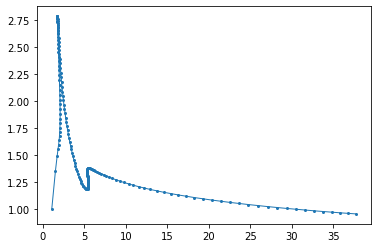

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
union is not found
intersection is not found
Cost not calculated
Simulation took:  0:00:53.788176
Simulation index: 13
a: 0.025 delta_u: 0.011 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:31:57.666970
a:  0.025 delta_u:  0.011 delta_ny:  0.01 gamma_u:  0.1


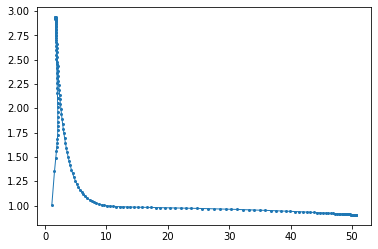

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
union is not found
intersection is not found
Cost not calculated
Simulation took:  0:00:53.991518
Simulation index: 14
a: 0.0275 delta_u: 0.011 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:32:51.684732
a:  0.0275 delta_u:  0.011 delta_ny:  0.01 gamma_u:  0.1


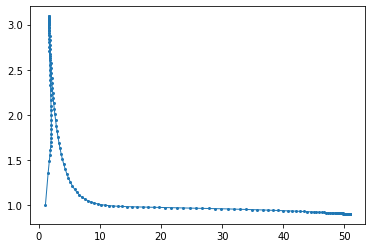

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
union is not found
intersection is not found
Cost not calculated
Simulation took:  0:00:54.833921
Simulation index: 15
a: 0.03 delta_u: 0.011 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:33:46.559725
a:  0.03 delta_u:  0.011 delta_ny:  0.01 gamma_u:  0.1


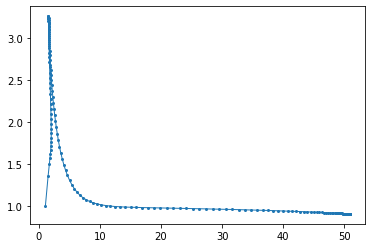

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 8.0081289254463393 1.4016212223585045 at 8.0081289254463393 1.4016212223585045
union is not found
intersection is not found
Cost not calculated
Simulation took:  0:00:53.434301
Simulation index: 16
a: 0.0225 delta_u: 0.0125 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:34:40.022001
a:  0.0225 delta_u:  0.0125 delta_ny:  0.007 gamma_u:  0.1


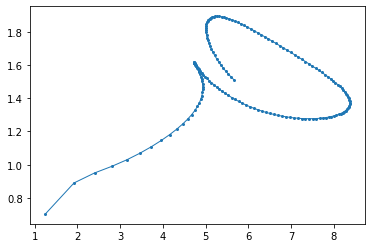

A_m is not valid
Simulation took:  0:00:55.546915
Simulation index: 17
a: 0.025 delta_u: 0.0125 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:35:35.611777
a:  0.025 delta_u:  0.0125 delta_ny:  0.007 gamma_u:  0.1


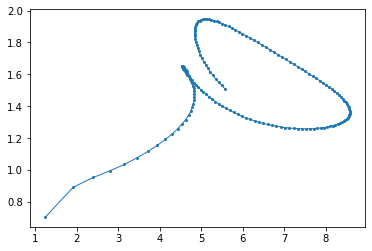

A_m is not valid
Simulation took:  0:00:59.218787
Simulation index: 18
a: 0.0275 delta_u: 0.0125 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:36:34.863514
a:  0.0275 delta_u:  0.0125 delta_ny:  0.007 gamma_u:  0.1


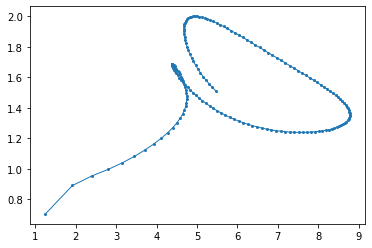

A_m is not valid
Simulation took:  0:01:02.967444
Simulation index: 19
a: 0.03 delta_u: 0.0125 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:37:37.858719
a:  0.03 delta_u:  0.0125 delta_ny:  0.007 gamma_u:  0.1


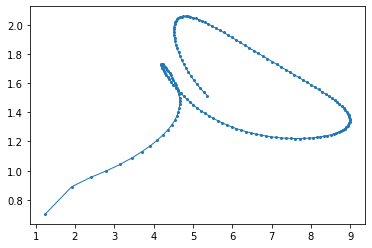

A_m is not valid
Simulation took:  0:00:53.760065
Simulation index: 20
a: 0.0225 delta_u: 0.0125 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:38:31.643756
a:  0.0225 delta_u:  0.0125 delta_ny:  0.008 gamma_u:  0.1


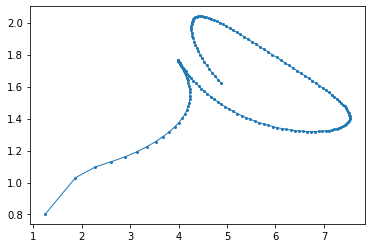

A_m is not valid
Simulation took:  0:00:53.992702
Simulation index: 21
a: 0.025 delta_u: 0.0125 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:39:25.654241
a:  0.025 delta_u:  0.0125 delta_ny:  0.008 gamma_u:  0.1


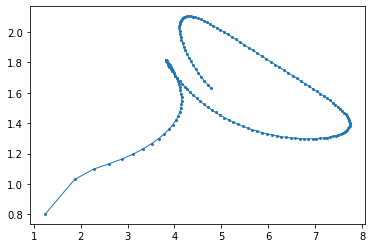

A_m is not valid
Simulation took:  0:00:54.424934
Simulation index: 22
a: 0.0275 delta_u: 0.0125 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:40:20.117081
a:  0.0275 delta_u:  0.0125 delta_ny:  0.008 gamma_u:  0.1


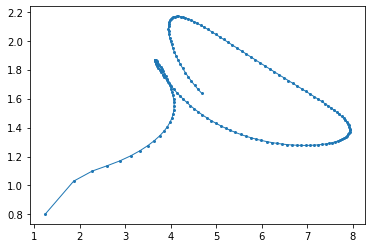

A_m is not valid
Simulation took:  0:00:53.723801
Simulation index: 23
a: 0.03 delta_u: 0.0125 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:41:13.863641
a:  0.03 delta_u:  0.0125 delta_ny:  0.008 gamma_u:  0.1


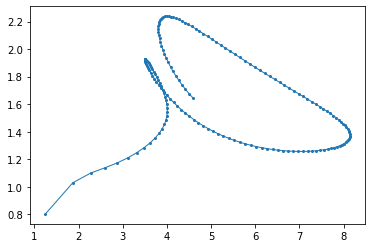

A_m is not valid
Simulation took:  0:00:54.245116
Simulation index: 24
a: 0.0225 delta_u: 0.0125 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:42:08.132652
a:  0.0225 delta_u:  0.0125 delta_ny:  0.009 gamma_u:  0.1


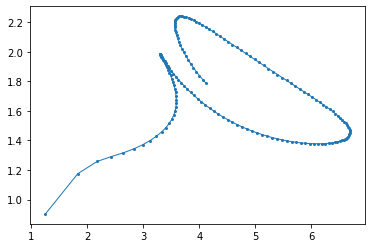

A_m is not valid
Simulation took:  0:00:52.872315
Simulation index: 25
a: 0.025 delta_u: 0.0125 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:43:01.031715
a:  0.025 delta_u:  0.0125 delta_ny:  0.009 gamma_u:  0.1


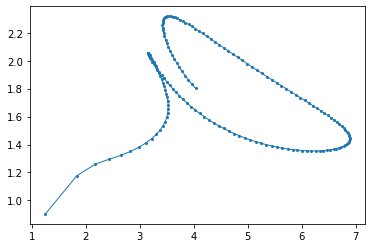

A_m is not valid
Simulation took:  0:00:52.916444
Simulation index: 26
a: 0.0275 delta_u: 0.0125 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:43:54.000020
a:  0.0275 delta_u:  0.0125 delta_ny:  0.009 gamma_u:  0.1


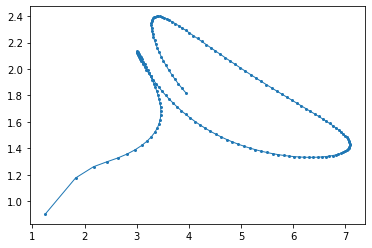

A_m is not valid
Simulation took:  0:00:54.465661
Simulation index: 27
a: 0.03 delta_u: 0.0125 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:44:48.484645
a:  0.03 delta_u:  0.0125 delta_ny:  0.009 gamma_u:  0.1


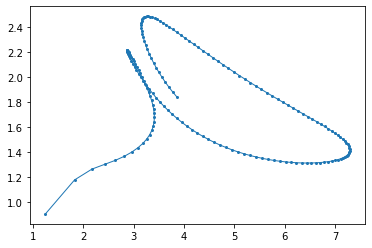

A_m is not valid
Simulation took:  0:00:54.374766
Simulation index: 28
a: 0.0225 delta_u: 0.0125 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:45:42.885763
a:  0.0225 delta_u:  0.0125 delta_ny:  0.01 gamma_u:  0.1


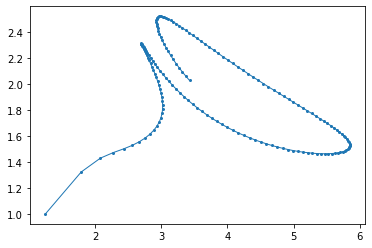

A_m is not valid
Simulation took:  0:00:53.749834
Simulation index: 29
a: 0.025 delta_u: 0.0125 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:46:36.684998
a:  0.025 delta_u:  0.0125 delta_ny:  0.01 gamma_u:  0.1


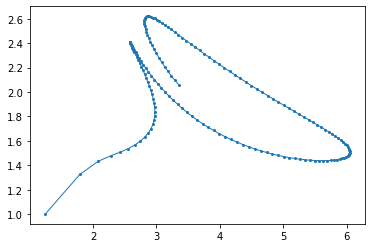

A_m is not valid
Simulation took:  0:00:55.282850
Simulation index: 30
a: 0.0275 delta_u: 0.0125 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:47:32.036208
a:  0.0275 delta_u:  0.0125 delta_ny:  0.01 gamma_u:  0.1


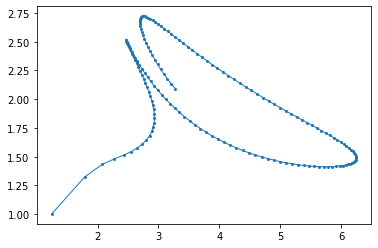

A_m is not valid
Simulation took:  0:00:54.288197
Simulation index: 31
a: 0.03 delta_u: 0.0125 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:48:26.521588
a:  0.03 delta_u:  0.0125 delta_ny:  0.01 gamma_u:  0.1


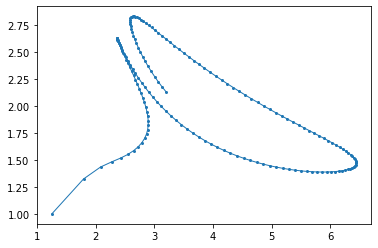

A_m is not valid
Simulation took:  0:00:54.145960
Simulation index: 32
a: 0.0225 delta_u: 0.014 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:49:20.715305
a:  0.0225 delta_u:  0.014 delta_ny:  0.007 gamma_u:  0.1


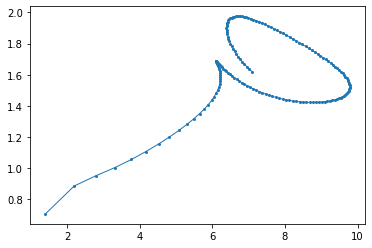

A_m is not valid
Simulation took:  0:00:54.771685
Simulation index: 33
a: 0.025 delta_u: 0.014 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:50:15.640455
a:  0.025 delta_u:  0.014 delta_ny:  0.007 gamma_u:  0.1


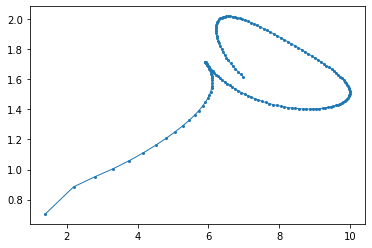

A_m is not valid
Simulation took:  0:00:55.692316
Simulation index: 34
a: 0.0275 delta_u: 0.014 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:51:11.355995
a:  0.0275 delta_u:  0.014 delta_ny:  0.007 gamma_u:  0.1


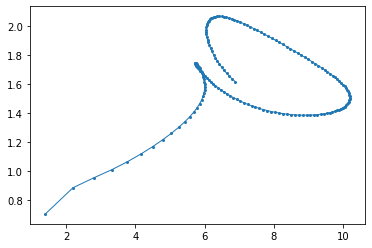

A_m is not valid
Simulation took:  0:00:54.610479
Simulation index: 35
a: 0.03 delta_u: 0.014 delta_ny: 0.007 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:52:06.010524
a:  0.03 delta_u:  0.014 delta_ny:  0.007 gamma_u:  0.1


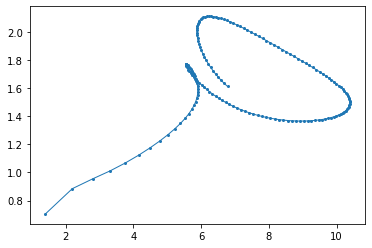

A_m is not valid
Simulation took:  0:00:55.660464
Simulation index: 36
a: 0.0225 delta_u: 0.014 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:53:01.694726
a:  0.0225 delta_u:  0.014 delta_ny:  0.008 gamma_u:  0.1


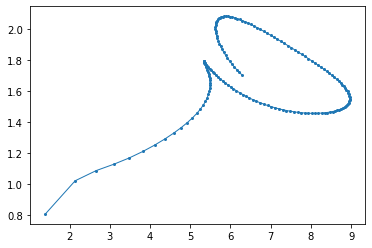

A_m is not valid
Simulation took: 0:00:54.258097
Simulation index: 37
a: 0.025 delta_u: 0.014 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:53:56.020067
a:  0.025 delta_u:  0.014 delta_ny:  0.008 gamma_u:  0.1


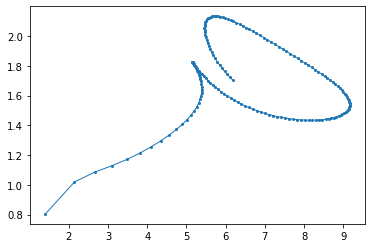

A_m is not valid
Simulation took:  0:00:55.599723
Simulation index: 38
a: 0.0275 delta_u: 0.014 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:54:51.697309
a:  0.0275 delta_u:  0.014 delta_ny:  0.008 gamma_u:  0.1


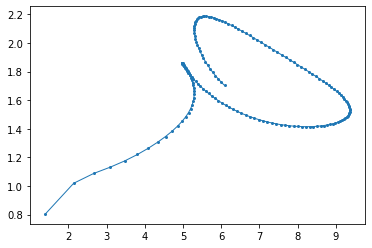

A_m is not valid
Simulation took:  0:00:55.807638
Simulation index: 39
a: 0.03 delta_u: 0.014 delta_ny: 0.008 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:55:47.546766
a:  0.03 delta_u:  0.014 delta_ny:  0.008 gamma_u:  0.1


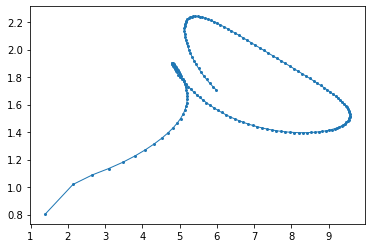

A_m is not valid
Simulation took:  0:00:55.500116
Simulation index: 40
a: 0.0225 delta_u: 0.014 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:56:43.065866
a:  0.0225 delta_u:  0.014 delta_ny:  0.009 gamma_u:  0.1


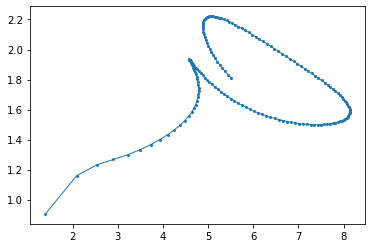

A_m is not valid
Simulation took:  0:00:53.541299
Simulation index: 41
a: 0.025 delta_u: 0.014 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:57:36.733356
a:  0.025 delta_u:  0.014 delta_ny:  0.009 gamma_u:  0.1


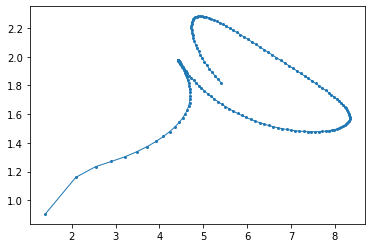

A_m is not valid
Simulation took:  0:00:54.298939
Simulation index: 42
a: 0.0275 delta_u: 0.014 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:58:31.081615
a:  0.0275 delta_u:  0.014 delta_ny:  0.009 gamma_u:  0.1


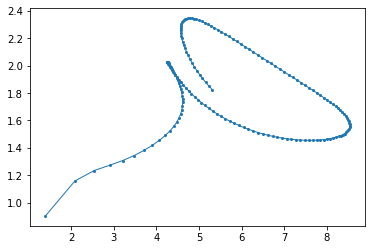

A_m is not valid
Simulation took:  0:00:55.052512
Simulation index: 43
a: 0.03 delta_u: 0.014 delta_ny: 0.009 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 15:59:26.159249
a:  0.03 delta_u:  0.014 delta_ny:  0.009 gamma_u:  0.1


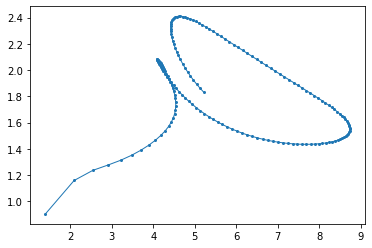

A_m is not valid
Simulation took:  0:00:54.134429
Simulation index: 44
a: 0.0225 delta_u: 0.014 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 16:00:20.323689
a:  0.0225 delta_u:  0.014 delta_ny:  0.01 gamma_u:  0.1


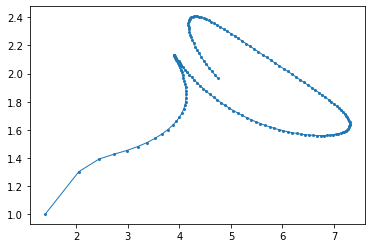

A_m is not valid
Simulation took:  0:00:54.590190
Simulation index: 45
a: 0.025 delta_u: 0.014 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 16:01:14.942380
a:  0.025 delta_u:  0.014 delta_ny:  0.01 gamma_u:  0.1


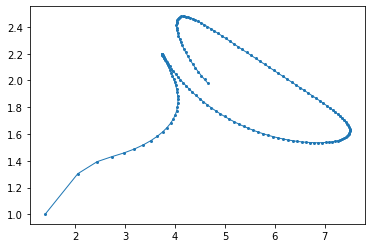

A_m is not valid
Simulation took:  0:00:55.230288
Simulation index: 46
a: 0.0275 delta_u: 0.014 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 16:02:10.207555
a:  0.0275 delta_u:  0.014 delta_ny:  0.01 gamma_u:  0.1


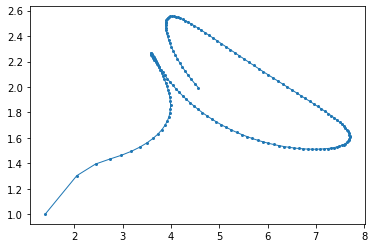

A_m is not valid
Simulation took:  0:00:53.689742
Simulation index: 47
a: 0.03 delta_u: 0.014 delta_ny: 0.01 gamma_u: 0.1 timestep: 3
Simulation started at:  2020-04-28 16:03:03.931300
a:  0.03 delta_u:  0.014 delta_ny:  0.01 gamma_u:  0.1


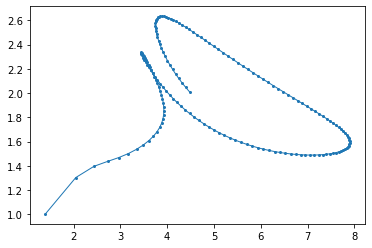

A_m is not valid
Simulation took:  0:00:54.728473


In [43]:
# Model calibration using Deterministic Solution

# Re import DDOM Package
importlib.reload(DDOM)

# Calibration data structure
parameters = {}

# Visual inspection of Beveridge curve gives following period
parameters['years'] = 10.25
parameters['T'] = 10.25

# Parameters to be calibrated
# parameters['a'] = [0.005, 0.035, 0.075, 0.1]
# parameters['delta_u'] = [0.006, 0.02, 0.05]
# parameters['delta_ny'] = [0.005, 0.015, 0.025]
# parameters['gamma_u'] = [0.05, 0.1, 0.15, 0.2]
# parameters['timestep'] = [2, 4, 6, 8]
# parameters['gamma_ny'] = gamma_u

parameters['a'] = [0.03, 0.032, 0.034, 0.036]
parameters['delta_u'] = [0.013, 0.0135, 0.014]
parameters['delta_ny'] = [0.005, 0.006, 0.007]
parameters['gamma_u'] = [0.9, 0.1]
parameters['timestep'] = [3.1]

parameters['gamma_ny'] = parameters['gamma_u']



# Calibration data
start = 18
end = 59
empirical_data = sa_calibration_data.iloc[start:end]

# Shock parameters (not there yet)
parameters['t_0'] = 6
parameters['k'] = 1
parameters['L'] = 1
parameters['avg_hours_0'] = 1
parameters['shock_start'] = 1

# output variable
calibration_output = True

# Loop should give result = {dict with parameters:dict with outputs}
results = []
simulation_index = 0
for timestep in parameters['timestep']:
    for delta_u in parameters['delta_u']:
        for delta_ny in parameters['delta_ny']:
            for gamma_u in parameters['gamma_u']:
                for a in parameters['a']: 
                    print('Simulation index:', simulation_index)
                    print('a:', a, 'delta_u:', delta_u, 'delta_ny:', delta_ny, 'gamma_u:', gamma_u, 'timestep:', timestep)
                    employment = employment_SSYK[['SSYK', '2014']]
                    employment = {str(employment['SSYK'].iloc[i]):employment['2014'].iloc[i] for i in range(len(employment))}
                    node_names = list(G.nodes())

                    # setup network
                    employed = {str(name):e for name,e in employment.items() if str(name) in node_names}
                    unemployed = {name:0 for name in node_names}
                    vacancies = {name:0 for name in node_names}
                    applications = {name:[] for name in node_names}
                    target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
                    of_data = SSYK_shock.groupby(by = ['ssyk3'], axis = 0).mean()
                    of_data = of_data.to_dict()['Computerisation Probability']



                    attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies, 'applications':applications,
                    'target_demand':target_demand, 'comp_prob':of_data}
                    out_parameters = {'a':a, 'delta_u':delta_u, 'delta_ny':delta_ny, 'gamma_u':gamma_u, 'timestep':timestep}

                    output = DDOM.deterministic_simulation(G, parameters['years'], timestep, delta_u, gamma_u, delta_ny, gamma_u, empirical_data,
                    parameters['t_0'], parameters['k'], parameters['L'], parameters['avg_hours_0'], a, parameters['T'], parameters['shock_start'], 
                    attributes, calibration_output)
                    results.append({'parameters':parameters, 'output':output})
                    simulation_index += 1



In [ ]:
# Good around:
# delta_u = 0.014
# delta_ny = 0.008
# a = 0.03

# Try increasing a and decreasing u and ny

results

In [ ]:
# Model calibration
# Calibration data structure
parameters = {}

# Visual inspection of Beveridge curve gives following period
parameters['years'] = 10.25
parameters['T'] = 10.25

# Parameters to be calibrated
# parameters['a'] = [0.005, 0.035, 0.075, 0.1]
# parameters['delta_u'] = [0.006, 0.02, 0.05]
# parameters['delta_ny'] = [0.005, 0.015, 0.025]
# parameters['gamma_u'] = [0.05, 0.1, 0.15, 0.2]
# parameters['timestep'] = [2, 4, 6, 8]

parameters['a'] = [0.05]
parameters['delta_u'] = [0.02]
parameters['delta_ny'] = [0.005]
parameters['gamma_u'] = [0.05, 0.1, 0.15, 0.2]
parameters['timestep'] = [5]

parameters['gamma_ny'] = parameters['gamma_u']

# Calibration data
start = 18
end = 59
empirical_data = sa_calibration_data.iloc[start:end]

# Shock parameters (not there yet)
parameters['t_0'] = 10.25
parameters['k'] = 1
parameters['L'] = 1
parameters['avg_hours_0'] = 1
parameters['shock_start'] = 1

# output variable
calibration_output = True

# Loop should give result = [dict with parameters:dict with outputs]
results = []

for timestep in parameters['timestep']:
    for delta_u in parameters['delta_u']:
        for delta_ny in parameters['delta_ny']:
            for gamma_u in parameters['gamma_u']:
                for a in parameters['a']: 
                    employment = employment_SSYK[['SSYK', '2014']]
                    employment = {str(employment['SSYK'].iloc[i]):employment['2014'].iloc[i] for i in range(len(employment))}
                    node_names = list(G.nodes())
                    # setup network
                    employed = {str(name):e for name,e in employment.items() if str(name) in node_names}
                    unemployed = {name:0 for name in node_names}
                    vacancies = {name:0 for name in node_names}
                    applications = {name:[] for name in node_names}
                    target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
                    of_data = SSYK_shock.groupby(by = ['ssyk3'], axis = 0).mean()
                    of_data = of_data.to_dict()['Computerisation Probability']



                    attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies, 'applications':applications,
                    'target_demand':target_demand, 'comp_prob':of_data}
                    out_parameters = {'a':a, 'delta_u':delta_u, 'delta_ny':delta_u, 'gamma_u':gamma_u, 'timestep':timestep}

                    output = DDOM.simulation(G, data, years, timestep, delta_u, gamma_u, delta_ny, gamma_ny, empirical_data, t_0, k, L, avg_hours_0, a, T,                                               shock_start, attributes, calibration_output)
                    results.append({'parameters':out_parameters, 'output':output})

